> **DO NOT EDIT IF INSIDE annadl_f19 folder**


# Keras, overfitting, regularlization

- Part 3.1: Basic Keras
- Part 3.2: Regularization and overfitting

[**Feedback**]((https://ulfaslak.com/vent))

In [4]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense

## Exercises

### Part 3.1: Basic Keras

> **Ex. 3.1.1** Let's get started with Keras by working with an actual neural network.
1. Implement a very simple `Sequential` model using [*Getting started with the Keras Sequential model*](https://keras.io/getting-started/sequential-model-guide/) as a guide.
2. Fit it to the [mnist](https://keras.io/datasets/#mnist-database-of-handwritten-digits) dataset of handwritten digits that I have prepared below.
3. Compute the accuracy on the test set using the `evaluate` function.
4. BONUS: Can you score over 90% accuracy in just five training epochs?

In [9]:
(x, y), _ = keras.datasets.mnist.load_data()

# Reshape each image to 1dim vector. Effectively, reshape
# `x_train` from (60000, 28, 28) to (60000, 28*28)
x_train = x[:50000].reshape(-1, 28*28)
x_test = x[50000:].reshape(-1, 28*28)

# Convert y_train from vector of labels to one-hot encoding vector
y = keras.utils.to_categorical(y, num_classes=10)
y_train = y[:50000]
y_test = y[50000:]

In [10]:
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense, Dropout


model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('sigmoid'),
    Dense(10),
    Activation('softmax'),
])

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model.fit(x_train, y_train, epochs=5, batch_size=32)

score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/5
50000/50000 [==============================] - 1s 24us/step - loss: 1.3648 - accuracy: 0.5522
Epoch 2/5
50000/50000 [==============================] - 1s 27us/step - loss: 1.0751 - accuracy: 0.6321 0s - loss: 1.0764 - accuracy
Epoch 3/5
50000/50000 [==============================] - 1s 27us/step - loss: 1.0560 - accuracy: 0.6438
Epoch 4/5
50000/50000 [==============================] - 2s 37us/step - loss: 0.9914 - accuracy: 0.6594
Epoch 5/5
10000/10000 [==============================] - 0s 9us/step


> **Ex. 3.1.2** One of the coolest features we get basically for free when using Keras with the Tensorflow backend is the **Tensorboard**.
It allows us to visualize training and test curves, our network graph, and more, in an interactive format.
Below I have implemented a simple linear regression, adapt and launch a visualization of the training performance.

In [19]:
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 101)
y = 3 * x + np.random.randn(*x.shape) * 0.33

model = Sequential()
model.add(Dense(input_dim=1, output_dim=1, init='uniform', activation='linear'))
model.compile(optimizer='sgd', loss='mse')
model.fit(x, y, nb_epoch=200, verbose=1)
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#USE this 
#https://keras.io/callbacks/#tensorboard


#conda install python-graphviz
keras.callbacks.tensorboard_v1.TensorBoard(log_dir='/Users/alderik/Documents/School/College/DIS/neuralnetworks/tensor/./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, activation="linear", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Epoch 1/200
101/101 [==============================] - 0s 508us/step - loss: 3.0406
Epoch 2/200
101/101 [==============================] - 0s 44us/step - loss: 2.8987
Epoch 3/200
101/101 [==============================] - 0s 57us/step - loss: 2.7479
Epoch 4/200
101/101 [==============================] - 0s 34us/step - loss: 2.6221
Epoch 5/200
101/101 [==============================] - 0s 35us/step - loss: 2.4861
Epoch 6/200
101/101 [==============================] - 0s 46us/step - loss: 2.3714
Epoch 7/200
101/101 [==============================] - 0s 41us/step - loss: 2.2451
Epoch 8/200
101/101 [==============================] - 0s 42us/step - loss: 2.1240
Epoch 9/200
101/101 [==============================] - 0s 38us/step - loss: 2.0246
Epoch 10/200
101/101 [==============================] - 0s 38us/step - loss: 1.9294
Epoch 11/200
101/101 [==============================] - 0s 43us/step - loss: 1.8324
Epoch 12/200
101/101 [==============================] - 0s 52us/step - loss: 1.7362


101/101 [==============================] - 0s 32us/step - loss: 0.1244
Epoch 99/200
101/101 [==============================] - 0s 57us/step - loss: 0.1234
Epoch 100/200
101/101 [==============================] - 0s 35us/step - loss: 0.1227
Epoch 101/200
101/101 [==============================] - 0s 32us/step - loss: 0.1218
Epoch 102/200
101/101 [==============================] - 0s 34us/step - loss: 0.1212
Epoch 103/200
101/101 [==============================] - 0s 44us/step - loss: 0.1204
Epoch 104/200
101/101 [==============================] - 0s 44us/step - loss: 0.1198
Epoch 105/200
101/101 [==============================] - 0s 30us/step - loss: 0.1193
Epoch 106/200
101/101 [==============================] - 0s 30us/step - loss: 0.1190
Epoch 107/200
101/101 [==============================] - 0s 31us/step - loss: 0.1184
Epoch 108/200
101/101 [==============================] - 0s 55us/step - loss: 0.1180
Epoch 109/200
101/101 [==============================] - 0s 42us/step - loss: 0.

101/101 [==============================] - 0s 53us/step - loss: 0.1096
Epoch 195/200
101/101 [==============================] - 0s 47us/step - loss: 0.1096
Epoch 196/200
101/101 [==============================] - 0s 51us/step - loss: 0.1095
Epoch 197/200
101/101 [==============================] - 0s 41us/step - loss: 0.1095
Epoch 198/200
101/101 [==============================] - 0s 44us/step - loss: 0.1095
Epoch 199/200
101/101 [==============================] - 0s 49us/step - loss: 0.1096
Epoch 200/200
101/101 [==============================] - 0s 48us/step - loss: 0.1095
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
Train on 75 samples, validate on 26 samples
Epoch 1/50
75/75 [=====

KeyError: 'acc'

> **Ex. 3.1.3** Solve exercises 1.2.2 and 1.2.3 from week 1, but solve them using Keras.
> Comment on differences in speed (and outcome if you observe any).
You can for example use Tensorboard to inspect the training performance throught the training epochs.

### Part 3.1: Overfitting and regularization

When a model *overfits* it means that it memorizes the outcomes for each training data point rather than general patterns.
Thus an overfitted model will score extremely well on the training data but poorly on new unseen data. 
In general, the more flexible a model is the easier it will overfit, and for this reason neural networks are notorious overfitters.
Broadly speaking, the way to combat this is to *regularize* the network.

> **Ex. 3.2.1** To understand overfitting, we overfit some data! Let's fit a neural network to data that has no inherent patterns: *noise*.

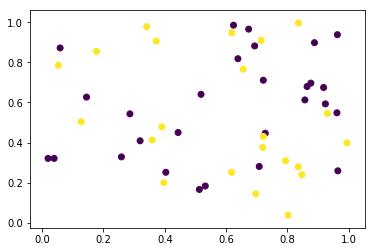

In [96]:
# Generate some data-points
x = np.random.random(size=(50, 2))

# And some random outcomes
y = np.random.randint(0, 2, size=(50, ))

# Plot it
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

> Now, create a network that attains a an accuracy score over 80% in predicting which points are class 0 and which are class 1.
>
> *Hint*: The bigger the network, the bigger the overfitting.

> **Ex 3.2.2** Norm regularization:
> 1. Apply L2 regularization to your network so that it, across the same number of batches, cannot overfit.
> 2. What does L2 regularization do? Compare the absolute size of weights in the unregularized and regularized model.
>
> *Hint:* `model.weights` will give you a list of weights and bias arrays for each layer. They are in a Tensorflow format but you can call `.numpy()` on them to get them out as numpy arrays.

> **Ex 3.2.3** Early stopping: Often we like to monitor the model's performance on a test set also while we train the model.
This allows us to do something called "early stopping" which is a way of regularizing by stopping the training process before the network overfits (we know it overfits when the performance on the training set starts getting much better than on the test set).
Implement early stopping when training on the random data above. What accuracy do you get?
>
> *Hint*: There's an example [here](https://keras.io/getting-started/faq/#how-can-i-interrupt-training-when-the-validation-loss-isnt-decreasing-anymore).

> **Ex 3.2.4** Dropout: Another clever way to regularize a network, is to randomly "drop out" some fraction of neurons during each training batch, so the network cannot store memory in specific neurons. The method is called Dropout. Go ahead and take your overfitting model and apply dropout in one or more of the layers and comment on the performance.
>
> *Hint*: Check out the reference [here](https://keras.io/layers/core/#dropout).